# Introduction to Image Processing

Guillaume Lemaitre - Fabrice Meriaudeau

## Introduction to scikit-image

The modules which are commonly used are entered in the following cell.

In [27]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

### Image in skimage

The first step of this practise is to learn the procedure to deal with image in `python`.

In this regard, you will need to refer to two main modules of *skimage*. The first module will give all information about [input-output](http://scikit-image.org/docs/dev/api/skimage.io.html) in order to read, write, and show image. The second module is as important and refers to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) which allow you to know what is the data type of the images.

#### IO module

In this part, you will rely on the module **io** of the `skimage`. This module can be imported as:

In [28]:
from skimage import io

Now, any function of this module can be called by `io.name_of_the_function`. See the following [webpage](http://scikit-image.org/docs/dev/api/skimage.io.html) to know all the functions available and the arguments of each of them.

##### imread() and imshow()

We will first play with the functions `io.imread()` and `io.imshow()` in order to read and show images. Refer to the documentation to know about the input and output arguments associated with this function. 

**The first task will be to read the grayscale image called `lena-grey.bmp` and show the output.**

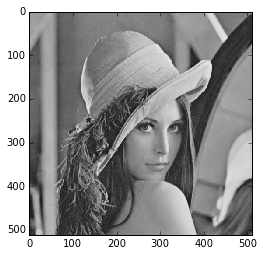

In [58]:
filename = 'images/lena-grey.bmp'

img = io.imread(filename)
io.imshow(img)


**In order to understand, the data type of this image, you can print the shape and data type of the image read.** Refer to function [`shape()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [`dtype()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) from the `numpy` library.

In [60]:
x = np.array([1, 2, 3, 4])
x.shape
y = np.zeros((2, 3, 4))
y.shape
print (img)
print(img.dtype)

[[162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 ..., 
 [ 43  43  50 ..., 104 100  98]
 [ 44  44  55 ..., 104 105 108]
 [ 44  44  55 ..., 104 105 108]]
uint8


The `io.imshow()` function is provided by the `skimage` library. However, it is interesting to know that this function is herited from the very well known `matplotlib` library. This library has been imported in the preamble of this document and can be called with the prefix `plt`. For instance, we can show an image as:

NameError: name 'color' is not defined

You can see that this image is displayed with false color. Each gray level is replaced by a given color. In this specific case, bright colors are represented by red-ish and dark colors by blue-ish. This mapping is known as `colormap`. To obtain similar results than in `skimage`, we need to apply a grey colormap. More information about colormap can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).


In [ ]:
# Show the same image using matplotlib library and a grey colormap
plt.imshow(lena_im, cmap=cm.Greys_r)

You can do the same manipulation and open a color image using the file `vibot-color.jpg`

In [ ]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

**Check the documentation of the function `imread` and open the previous color image as a grey scale image.**

In [ ]:
img = io.imread(filename)

Observe attentively the change of the data type.

##### Data type

It is important to understand which type of data do you obtain once the image is loaded. Subsequent algorithms will require a certain type (*ie.*, float, unsigned int) included in a certain data range. That is why, you need to refer to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) in order to perform the right conversion between types.

**Re-open the data from the grey-scale image `lena-grey.bmp` and print the matrix and the type which have been loaded by default.**

A set of functions allow to make automatic conversion between type and range and can be called as `img_as_type()`. 

Usually, algorithms expect images as float type in the range [0.0, 1.0]. However, the previous data were coded with 8-bits unsigned integer. 

**Convert the data into float included in the range [0.0, 1.0].**

From now, you are good to go in the world of digital image processing. However, always take care about the type of data you are dealing with and what results you are expecting from the different processes.

### Basic transformation functions

First, we will dig into the different basic transformation functions which allows to improve the contrast of grey scale images. All these functions are part of the `exposure` module of `skimage`.

In [ ]:
# We can import this module now
from skimage import exposure

As previously done with the module `io`, you can use any function of this module using `exposure.name_of_the_function()`.

#### Log transformations

The log transformation increases the contrast of the low intensities in an image by stretching a narrow range of these low intensities into a wider range of intensities. However, the opposite is taking place regarding the high intensities.

Refer to [`exposure.adjust_log()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#adjust-log) for the use of this function.

We recall the transformation function $s = c \log(1 + r)$. We illustrate this transformation by varying the parameter $c$.

In [ ]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(255, dtype='uint8')

# Define the parameter c
c = np.linspace(.1, 1.2, num=10)

# Plot the transform function
plt.figure()
for c_par in c:
    plt.plot(x, exposure.adjust_log(x, gain = c_par))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Log transformation function')
plt.axis('tight')
plt.show()

**Now this is your turn to make this transformation on a real image. Compute the magnitude of the Discrete Fourier Transform (DFT) of `lena-grey.bmp`. Apply the `np.fft.fft2()` as well as `np.abs()` function. Display the low frequency at the center of the image using the function `np.fft.fftshift()`.**

Additionaly, we provide the code to show the histogram of the image. 

**Later, use the log transformation to increase the contrast of the magnitude image. Display the resulting image as well as its histogram.**

In [ ]:

# Provided code to show the histogram
plt.figure()
n, bins, patches = plt.hist(lena_im_mag_log.flatten(), 256, range=(0., np.max(lena_im_mag_log.flatten())),
                            normed=1, histtype='stepfilled')

Note that you can compute the inverse function using the input argument `inv=True`. 

#### Power-Law (Gamma) transformation

By looking at the log transformation formulation, there is no ideal way to change the slope of the function. The gamma transformation offer this modulation using a parameter $\gamma$. The transformation function can be formulated as $s = cr^{\gamma}$.

We illustrate this transformation by varying the parameter $\gamma$.

In [ ]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='uint8')

# Define the parameter c
gamma = np.logspace(-1, 1., num=20)

# Plot the transform function
plt.figure()
for g in gamma:
    plt.plot(x, exposure.adjust_gamma(x, gamma=g, gain=1.))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Gamma transformation function')
plt.axis('tight')
plt.show()

**Use the gamma function to enhance the image for 10 different values of $\gamma$.**

#### Sigmoid transformation

We did not presented this function during the lecture. However, it can be used to enhance the contrast in images.

The transformation function is formulated as $s = \frac{1}{1 + \exp{\left(c(t - r)\right)}}$.

We will illustrate the function by varying the parameter $t$.

In [ ]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='float')

# Define the parameter c
cut_off = np.linspace(100., 200., num=5)

# Plot the transform function
plt.figure()
for t in cut_off:
    plt.plot(x, exposure.adjust_sigmoid(x, cutoff=t, gain=.1))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Sigmoid transformation function')
plt.axis('tight')
plt.show()

**Improve the contrast of the image `satellite.jpg` by setting the cut-off, once you observe the histogram of the image. You can set a gain equal to 10.**

#### Contrast stretching

Taking the satellite image as an example, it can be noticed that the intensitites are included in the range [0.6, 0.8]. A simple contrast stretching can be used to map the value of the intensity range [0.0, 1.0].

The function `exposure.rescale_intensity` is devoted for this purpose.

**Stretch the intensity value using this function.**

### Histogram processing

#### Histogram equalization

Histogram equalization can be used to enhance the contrast in images.

The idea behind the histogram equalization process is that each gray level should have an equal contribution in the image. The function allowing such transformation is in fact the cumulative density function.

The `exposure.equalize_hist` provide an optimized implementation for such processing. 

**Equalize the histogram of the satellite image.**

#### Adaptive (local) histogram equalization

The histogram equalization is a global process. The adaptive version allows to perform the histogram equalization for local areas. The contrast will be enhanced in dark and light area of an image which was not possible with the global processing.

The `exposure.equalize_adapthist` function corresponds to this processing in the `skimage`.

**Apply this algorithm for the satellite image with the default parameters regarding the region definition.**

Compare the results obtained with the global version of histogram equalization. Compare also the histogram obtained.

### Spatial filtering

#### Convolution by (almost) by hand

In the lecture, we saw that the convolution is the mathematical operator allowing to filter an image. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

**Use this image to filter the Lena image using a mean filter of size $9 \times 9$. You can use the function `np.ones` from `numpy` to create the proper mask.**

In [ ]:
from scipy import ndimage

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

#### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [ ]:
from skimage import filters

#####  First-order edge detector

We already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Lena image.**

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Lena image.**

##### Angular edge detector

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.

The `filters.gabor` in `skimage` implements this `filter.gabor`. 

**Apply this filters to find the edge at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].**

#### Optimal edge detector - Canny edge detector

We saw during the lecture, the Canny edge detector which is also implemented in `skimage` in the `feature` module.

**Detect the edges in Lena image using Canny filter.**

In [ ]:
from skimage import feature

##### Denoising filters

During the lecture, we saw different filters which can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [ ]:
from skimage import util

The first filter that we will study is the `mean` filter. 

**Apply this filter on the different corrupted Lena image with a mask corresponding to a disk of size 1, 5, and 10**. You can refer to `morphology.disk` regarding the structure element.

We also so that the alpha-trimmed mean filter which work similarly to the normal mean filter. However, this filter considered only the grey values inside a specific range.

This function is implemented in `skimage` with the name `mean_percentile`.

**Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95]. Try with different dimension of disk radius.**

Median filter performs better than mean filter in the presence of salt & peppers noise.

This filter is implemented in `skimage` in the function `median`.

**Apply this filtering method in the different Lena with the different radius as previously experimented.**

In the same manner, **apply the `maximum`, `minimum`, and `midpoint` filters.**

#### Optimal filter using Wiener filter.

We saw that Wiener filter is the optimal filter which minimize the least-square error.
This filter is implemented in the module `restoration` of `skimage`. 

**Apply this filter on the following blur and noisy image**

In [ ]:
from skimage import restoration

### Frequency filtering

We also saw that we can perform filtering in the frequency domain using the Fourier transform.

Using the algorithm presented in the lecture, filter the Lena image using a Sobel kernel.

We also saw some typical low- and high-pass filters: (i) ideal, (ii) Butterworth, and (iii) Gaussian filters.
We recall the formulation of each of these filters.

* The ideal low-pass filter is formulated as: $H_{lp}(u,v) =
  \begin{cases}
    1  & \quad \text{if } D(u, v) \leq D_0\\
    0  & \quad \text{if } D(u, v) > D_0\\
  \end{cases}
$ with $D_0$ is a positive constant and $D(u,v)$ is the distance between the point $(u,v)$ and the center.
* The Butterworth low-pass filter is formulated as: $H_{lp}(u,v) = \frac{1}{1+[D(u,v)/D_0]^{2n}}$ with $n$ the order of the filter.
* The Gaussian low-pass filter is formulated as: $H_{lp}(u,v) = \exp{\left(-D^{2}(u,v)/D_0^{2}\right)}$.

The high-pass filter are obtained such that $H_{hp} = 1 - H_{lp}$.

** Implement and apply these filters.**

### Morphological transformation

During the lecture, we presented several basic morphological operation. They are present in the module `morphology` in the `skimage`. 

**Using the image `bin_image.png`, apply successively the `erosion`, `dilation`, `opening`, `closing`, and `skeletonize`.** Use any structural element that you like.

In [ ]:
from skimage import morphology